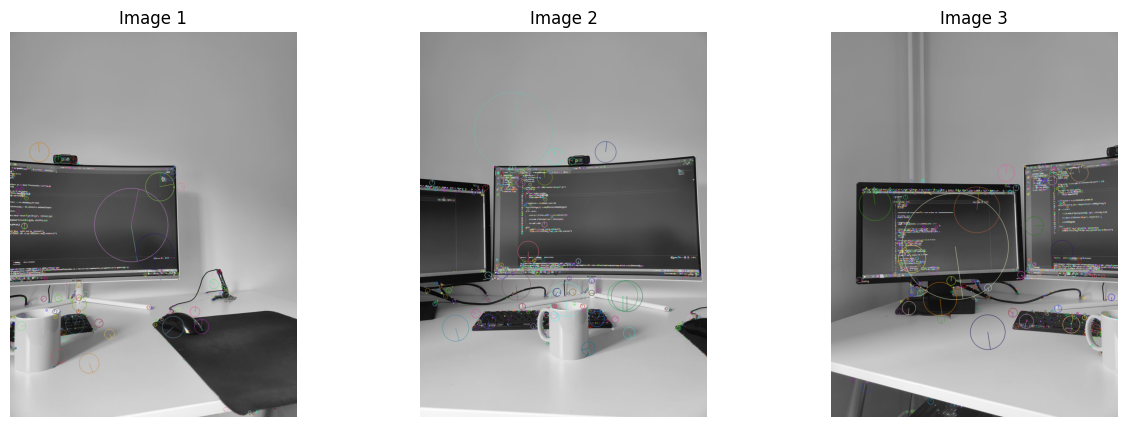

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
import os

image_paths = [
    "/content/first.jpg",
    "/content/second.jpg",
    "/content/third.jpg"
]


def process_images(image_paths):
    sift = cv.SIFT_create()

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i, img_path in enumerate(image_paths):

        imgGray = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

        if imgGray is None:
            print(f"Error: Image not found at {img_path}")
            continue


        keypoints = sift.detect(imgGray, None)
        imgGray = cv.drawKeypoints(imgGray, keypoints, imgGray, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        axes[i].imshow(imgGray, cmap='gray')
        axes[i].set_title(f"Image {i+1}")
        axes[i].axis("off")
    plt.show()


process_images(image_paths)


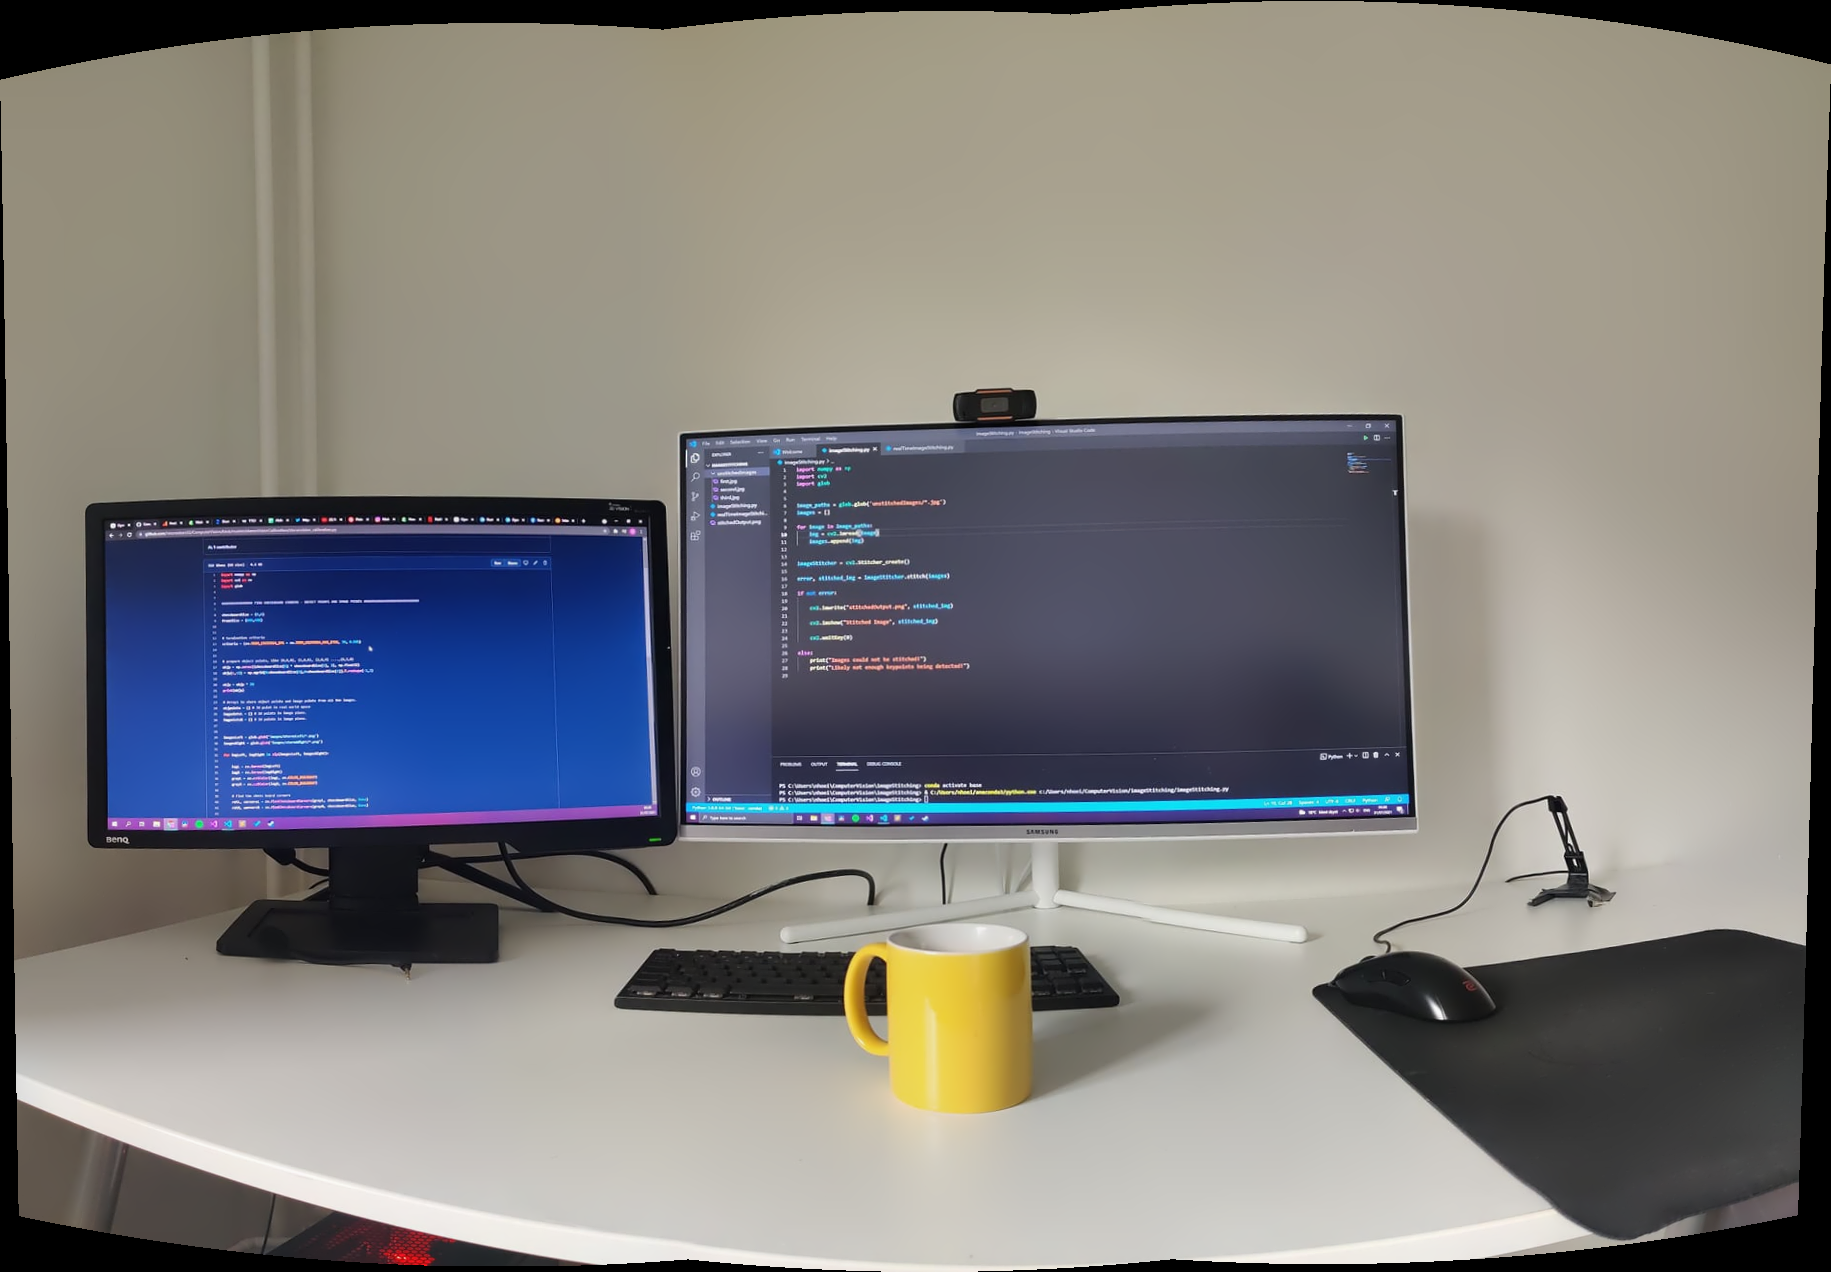

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
import numpy as np
import cv2
import imutils
import glob
import os
from google.colab.patches import cv2_imshow
from google.colab import files

image_paths = [
    "/content/third.jpg",
    "/content/second.jpg",
    "/content/first.jpg"
]

image_paths.sort(reverse=True)
images = [cv2.imread(img) for img in image_paths]

imageStitcher = cv2.Stitcher_create()

error, stitched_img = imageStitcher.stitch(images)

if not error:

    final_stitched_filename = "stitchedOutputProcessed.png"
    cv2.imwrite(final_stitched_filename, stitched_img)
    cv2_imshow(stitched_img)

    print("Downloading Stitched Image...")
    files.download(final_stitched_filename)

else:
    print("Images could not be stitched! Not enough keypoints detected.")
